# Import Packages, Functions and Data

In [1]:
import titanlib
import geopandas
import pandas as pd
import netCDF4
import numpy as np

from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime
import time



# Import custom version of titanlib containing changes
import titanlibcustom



# Import Formatted Data and functions from other Python script
from Data_Importation_and_Function_Definition import ROI_counties, NI_counties, rain_wow, rain_wow_hourly_obs, temp_wow, rain_official, temp_official, isolate_data_of_interest, plot_wow_data

Note: As advised, the Official Rainfall Rate column is currently beign set as equal to the 
Rainfall Accumulation Hourly column


# Obtain Test Data

In [2]:
gdf_temp_wow, gdf_temp_official, gdf_temp_combined = isolate_data_of_interest(day_of_interest="15", 
                                                                              month_of_interest="05",
                                                                              year_of_interest="2021", 
                                                                              time_of_interest="10",
                                                                              type_of_data="Temperature", 
                                                                              add_elevation_bool=True,
                                                                              remove_missing_val=True, 
                                                                              cols_to_remove_missing_val=["Air Temperature"])

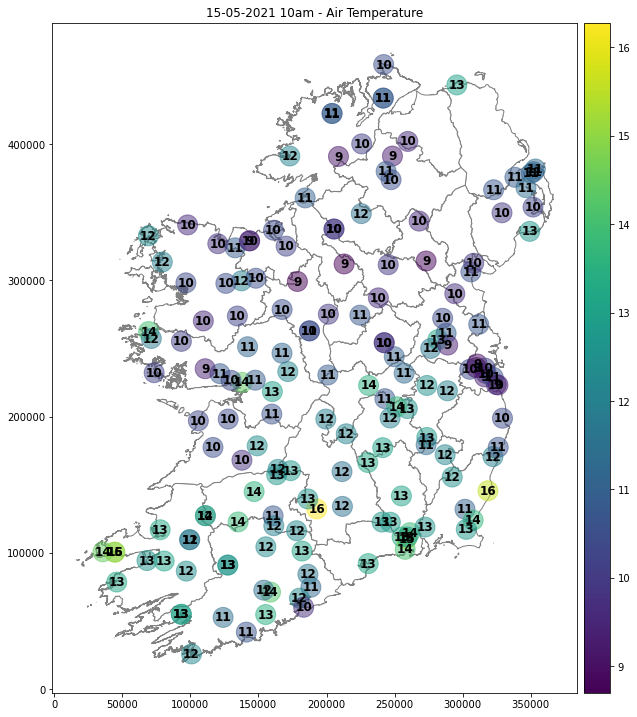

In [3]:
plot_wow_data(gdf_of_interest = gdf_temp_combined, type_of_plot = "Air Temperature", 
              buffer_val = 0, flags = None)

In [4]:
# By default let's discard any missing data from Rainfall Accumulation, Rainfall Accumulation Hourly
# or Rainfall Rate.

# Note if we were only interested in one of these values we could maximise our data points by only
# removing missing values from the column of interest
gdf_rain_wow, gdf_rain_official, gdf_rain_combined = isolate_data_of_interest(day_of_interest="15", 
                                                                              month_of_interest="05",
                                                                              year_of_interest="2021", 
                                                                              time_of_interest="10",
                                                                              type_of_data="Rainfall", 
                                                                              add_elevation_bool=True,
                                                                              remove_missing_val=True, 
                                                                              cols_to_remove_missing_val=["Rainfall Accumulation", 
                                                                                                          "Rainfall Accumulation Hourly", 
                                                                                                          "Rainfall Rate"])

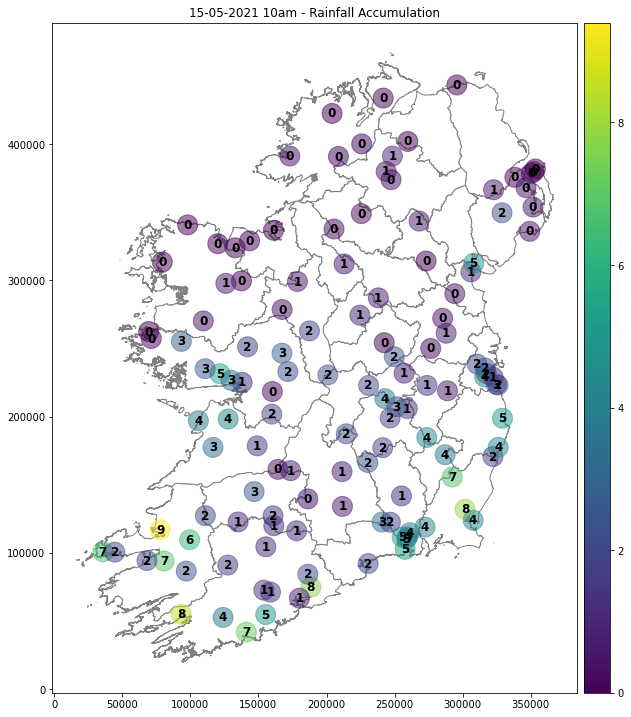

In [5]:
plot_wow_data(gdf_of_interest = gdf_rain_combined, type_of_plot = "Rainfall Accumulation", 
              buffer_val = 0, flags = None)

# Spatial Consistency Test

## Adapted Github Example

In [6]:
file_path_to_norway_test_data = r"/home/matt/Documents/Met_Eireann/Data/Met Norway Test Data/obs.nc"

with netCDF4.Dataset(file_path_to_norway_test_data, 'r') as file:
    lats = file.variables['latitude'][:]
    lons = file.variables['longitude'][:]
    points = titanlib.Points(lats, lons)
    temp_obs = file.variables['air_temperature_2m'][:,0]
    precip_obs = file.variables['precipitation_amount'][:,0]

num_min = 5
num_max = 100
inner_radius = 50000
outer_radius = 150000
num_iterations = 5
num_min_prof = 20
min_elev_diff = 200
min_horizontal_scale = 10000
vertical_scale = 200
pos = np.full(points.size(), 4)
neg = np.full(points.size(), 8)
eps2 = np.full(points.size(), 0.5)

flags = titanlib.sct(points, temp_obs, num_min, num_max, inner_radius, outer_radius,
                    num_iterations, num_min_prof, min_elev_diff, min_horizontal_scale, vertical_scale,
                    pos, neg, eps2)
print("\nUnadjusted Example with no elevations\n")
print("Flags\n")
print(flags[0])

print("\nProbability of Gross Error\n")
print(flags[1])

print("\nThe vector rep (I think)\n")
print(flags[2])

# include elevations to avoid flagging every observations

elevs = np.zeros(len(lats))
points = titanlib.Points(lats, lons, elevs)

flags = titanlib.sct(points, temp_obs, num_min, num_max, inner_radius, outer_radius,
                    num_iterations, num_min_prof, min_elev_diff, min_horizontal_scale, vertical_scale,
                    pos, neg, eps2)
print("\n\nAdding in elevations\n")
print("Flags\n")
print(flags[0])

print("\nProbability of Gross Error\n")
print(flags[1])

print("\nThe vector rep (I think)\n")
print(flags[2])


Unadjusted Example with no elevations

Flags

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

Probability of Gross Error

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]

The vector rep (I think)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


Adding in elevations

Flags

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]

Probability of Gross Error

[3.2330838e-01 2.4046388e-01 7.8163922e-01 2.5555

## Custom Example

In [7]:
lats = [53, 53.5, 53, 52.5, 53, 54, 53.5, 52.5, 52, 52.5, 53.5]
lons = [-8, -8, -7.5, -8, -8.5, -8, -7, -7, -8, -9, -9]

vals = [10, 10, 11, 10, 9, 11, 10, 9, 9, 10, 10]

test_df = pd.DataFrame(list(zip(lats, lons, vals)))

test_df.rename(columns={0: "Latitude", 1: "Longitude", 2: "Air Temperature"}, inplace = True)

test_df["Day"] = "n/a"
test_df["Month"] = "n/a"
test_df["Year"] = "n/a"
test_df["Time"] = "n/a"

# Convert data of interest into a GeoDataFrame for plotting
test_gdf = geopandas.GeoDataFrame(test_df, 
                                  geometry=geopandas.points_from_xy(test_df.Longitude, 
                                                                    test_df.Latitude))

test_gdf.crs = {"init":"epsg:4326"} # initialise the dataframe to have a crs
test_gdf = test_gdf.to_crs({'init': 'epsg:29902'}) # convert crs to Irish Grid Projection

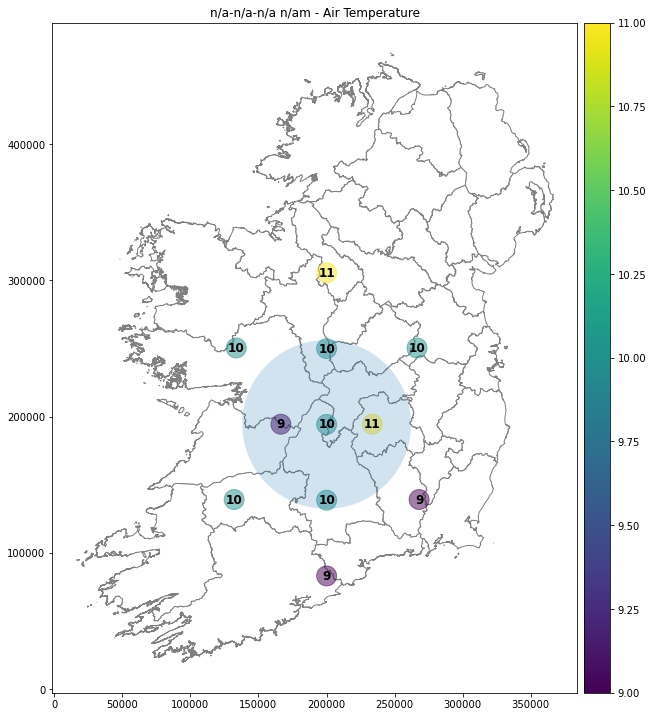

In [8]:
buffer_val_list = np.zeros(len(test_gdf), dtype = int)
buffer_val_list[0] = 62000
buffer_val_list = list(buffer_val_list)

plot_wow_data(test_gdf, type_of_plot = "Air Temperature", 
                  buffer_val = buffer_val_list, flags = None)

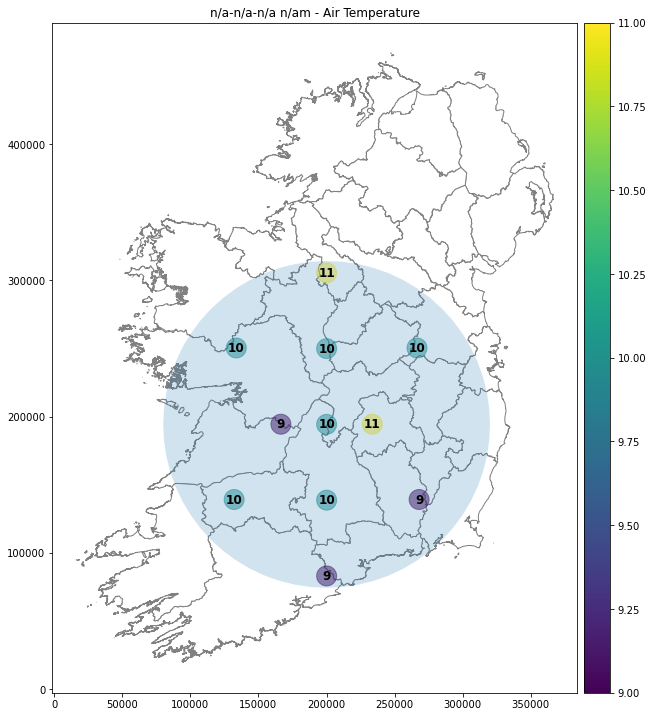

In [9]:
buffer_val_list = np.zeros(len(test_gdf), dtype = int)
buffer_val_list[0] = 120000
buffer_val_list = list(buffer_val_list)

plot_wow_data(test_gdf, type_of_plot = "Air Temperature", 
                  buffer_val = buffer_val_list, flags = None)

In [10]:
num_min = 5
num_max = 100
inner_radius = 62000
outer_radius = 120000
num_iterations = 5
num_min_prof = 20
min_elev_diff = 200
min_horizontal_scale = 10000
vertical_scale = 200

points = titanlib.Points(test_gdf["Latitude"], test_gdf["Longitude"])
values = np.array(test_gdf["Air Temperature"], dtype=float)

pos = np.full(points.size(), 4)
neg = np.full(points.size(), 4)
eps2 = np.full(points.size(), 0.5)

flags = titanlib.sct(points, values, num_min, num_max, inner_radius, outer_radius,
                    num_iterations, num_min_prof, min_elev_diff, min_horizontal_scale, vertical_scale,
                    pos, neg, eps2)
print("Flags\n")
print(flags[0])

print("\nProbability of Gross Error\n")
print(flags[1])

print("\nThe vector rep (I think)\n")
print(flags[2])

Flags

[1 1 1 1 1 1 1 1 1 1 1]

Probability of Gross Error

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

The vector rep (I think)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Note that every single station in the above example is being flagged as bad and the probability of Gross Error for each value is 0.

This is due to none of the stations having an elevation value attached to it, therefore it is impossible for the function to calculate a background value using the vertical profile method which is the only option for SCT.

If we add in some elevations the actual sct portion of the code will be able to run

In [11]:
elevs = np.zeros(len(test_gdf["Latitude"]))

points = titanlib.Points(test_gdf["Latitude"], test_gdf["Longitude"], elevs)
values = np.array(test_gdf["Air Temperature"], dtype=float)

flags = titanlib.sct(points, values, num_min, num_max, inner_radius, outer_radius,
                    num_iterations, num_min_prof, min_elev_diff, min_horizontal_scale, vertical_scale,
                    pos, neg, eps2)
print("Flags\n")
print(flags[0])

print("\nProbability of Gross Error\n")
print(flags[1])

print("\nThe vector rep (I think)\n")
print(flags[2])

Flags

[0 0 0 0 0 0 0 0 0 0 0]

Probability of Gross Error

[2.5925656e-05 2.2130196e-01 3.7182486e+00 4.5763367e-01 2.6980622e+00
 1.8082147e+00 3.6920364e-06 1.0569407e+00 1.0566397e+00 5.0919566e-02
 4.8763949e-02]

The vector rep (I think)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


So, for this tolerance level all stations passed the check, lets introduce some small outlier values and see if they get flagged

In [12]:
elevs = np.zeros(len(test_gdf["Latitude"]))

test_gdf["Air Temperature"] = [10, 10, 15, 10, 9, 11, 10, 9, 7, 10, 10]

points = titanlib.Points(test_gdf["Latitude"], test_gdf["Longitude"], elevs)
values = np.array(test_gdf["Air Temperature"], dtype=float)

flags = titanlib.sct(points, values, num_min, num_max, inner_radius, outer_radius,
                    num_iterations, num_min_prof, min_elev_diff, min_horizontal_scale, vertical_scale,
                    pos, neg, eps2)
print("Flags\n")
print(flags[0])

print("\nProbability of Gross Error\n")
print(flags[1])

print("\nThe vector rep (I think)\n")
print(flags[2])

Flags

[0 0 1 0 0 0 0 0 1 0 0]

Probability of Gross Error

[7.7767485e-01 1.6566442e-01 8.2111683e+00 6.0915130e-01 2.7511504e+00
 2.9984255e+00 5.8622282e-02 1.8333335e+00 4.1150131e+00 3.0552161e-01
 5.6168798e-08]

The vector rep (I think)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


red: Stations that have been flagged as bad


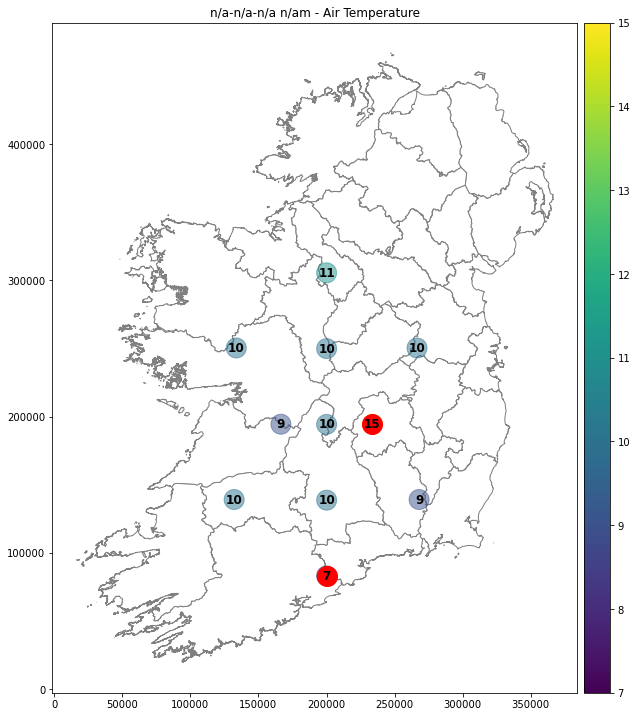

In [13]:
plot_wow_data(test_gdf, type_of_plot = "Air Temperature", 
                  buffer_val = 0, flags = flags[0])

## Example on Real World Data

In [14]:
num_min = 5
num_max = 100
inner_radius = 20000
outer_radius = 40000
num_iterations = 5
num_min_prof = 20
min_elev_diff = 200
min_horizontal_scale = 10000
vertical_scale = 200

long_np = np.array(gdf_temp_combined["Longitude"])
lat_np = np.array(gdf_temp_combined["Latitude"])
elevs_np = np.array(gdf_temp_combined["Altitude"])

points = titanlib.Points(lat_np, long_np, elevs_np)
values = np.array(gdf_temp_combined["Air Temperature"], dtype=float)

pos = np.full(points.size(), 4)
neg = np.full(points.size(), 4)
eps2 = np.full(points.size(), 0.5)

flags = titanlib.sct(points, values, num_min, num_max, inner_radius, outer_radius,
                    num_iterations, num_min_prof, min_elev_diff, min_horizontal_scale, vertical_scale,
                    pos, neg, eps2)
print("Flags\n")
print(flags[0])

print("\nProbability of Gross Error\n")
print(flags[1])

print("\nThe vector rep (I think)\n")
print(flags[2])

Flags

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Probability of Gross Error

[2.18576670e-01 2.62541318e+00 5.05331814e-01 4.64864948e-04
 9.21491981e-02 5.43311357e-01 1.74961329e+00 2.86563969e+00
 2.01473427e+00 3.03899229e-01 2.62745380e+00 1.29278040e+00
 1.19739033e-01 1.98308825e-01 2.05696464e+00 1.22058463e+00
 2.41401270e-01 3.45738816e+00 2.06013656e+00 6.73505187e-01
 2.79838252e+00 3.62159163e-02 3.59391093e+00 2.82418227e+00
 1.47717381e+00 5.43528938e+00 0.00000000e+00 4.58280993e+00
 7.44203091e-01 2.41867232e+00 4.30609131e+00 1.69380307e-01
 4.85255861e+00 0.00000000e+00 5.70617199e+00 1.69936642e-01
 7.28585660e-01 6.72547519e-01 3.54397154e+00 5.25250387e+00
 2.87466526e-01 

red: Stations that have been flagged as bad


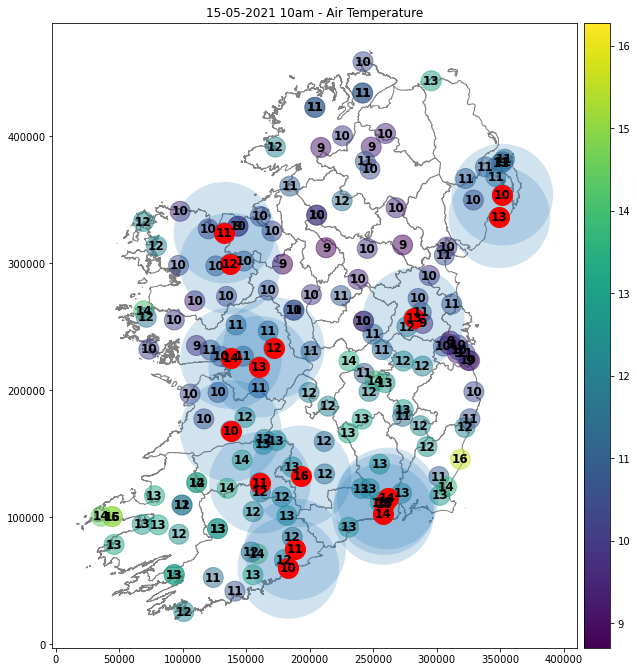

In [15]:
buffer_val_list = np.zeros(len(gdf_temp_combined), dtype = int)
indices = [i for i, x in enumerate(flags[0]) if x == 1]
buffer_val_list[indices] = outer_radius
buffer_val_list = list(buffer_val_list)

plot_wow_data(gdf_of_interest = gdf_temp_combined, type_of_plot = "Air Temperature", 
              buffer_val = buffer_val_list, flags = flags[0])